In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/Honours/Processed Data/individual_data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
filename = '69.txt'

ind = np.loadtxt(path+filename)

time = ind[:, 0]
node = ind[:, 1]
state = ind[:, 2]

### "Continuous" Time (Year) vs. Node Change
Scatter plot the changes that happends at each node at time t. Red indicates damaged; green indicates repaired.

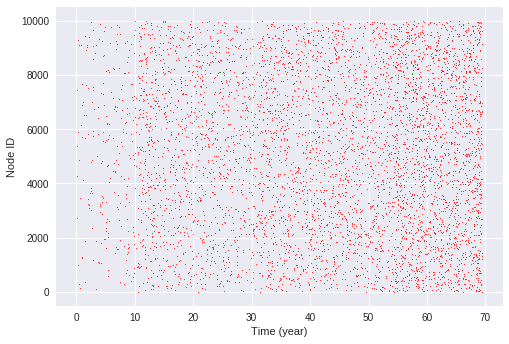

In [4]:
for i in range(0, len(time)):
    if state[i] == 1:
        plt.scatter(time[i], node[i], c = 'red', s = 0.5)
    elif state[i] == 0:
        plt.scatter(time[i], node[i], c = 'green', s = 0.7)
    else:
        print("WHAT THE")
        
    
    plt.xlabel("Time (year)")
    plt.ylabel("Node ID")


###Discrete Year vs. Number of of Deficits
Plot the number of damages independent of node ID in discrete units of year.

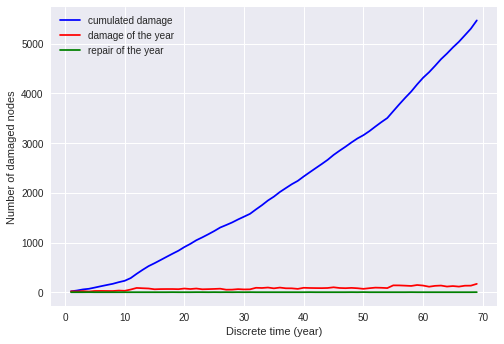

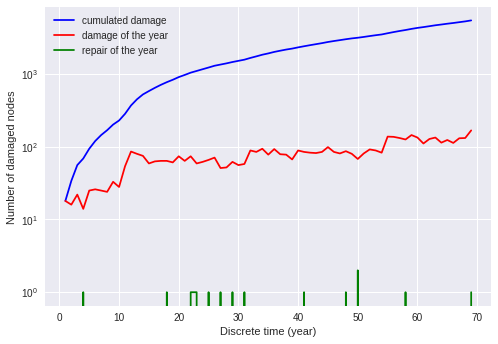

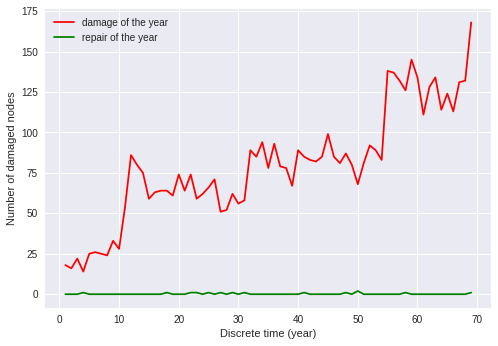

In [5]:
def plot_all_three():
    plt.xlabel("Discrete time (year)")
    plt.ylabel("Number of damaged nodes")
    plt.plot(times, total_dams, c = 'b', label = 'cumulated damage')
    plt.plot(times, dams, c = 'r', label = 'damage of the year')
    plt.plot(times, reps, c = 'g', label = 'repair of the year')
    plt.legend()
    

t0, total_dam, dam, rep = 1, 0, 0, 0
times, total_dams, dams, reps = [], [], [], []
for i in range(0, len(time)):
    if time[i] > t0:
        times.append(t0)
        total_dams.append(total_dam)
        dams.append(dam)
        reps.append(rep)

        t0 += 1
        dam = 0
        rep = 0

    if state[i] == 1:
        total_dam += 1
        dam += 1
    elif state[i] == 0:
        total_dam -= 1
        rep += 1
    else:
        print("WHAT THE")

plt.figure(1)
plot_all_three()
plt.figure(2)
plt.yscale("log")
plot_all_three()

plt.figure(3)
plt.xlabel("Discrete time (year)")
plt.ylabel("Number of damaged nodes")
plt.plot(times, dams, c = 'r', label = 'damage of the year')
plt.plot(times, reps, c = 'g', label = 'repair of the year')
plt.legend()